In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
import renders as rs

import matplotlib.pyplot as plt
from IPython.display import display # Allows the use of display() for DataFrames
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings("ignore")
# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("Wholesale customers data.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print ("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print ("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# DATA EXPLORATION

In [2]:
# Display a description of the dataset
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


[133 245 396]
Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9434,1042,1235,436,256,396
1,3062,6154,13916,230,8933,2784
2,4515,11991,9345,2644,3378,2213


Quartile Visualization


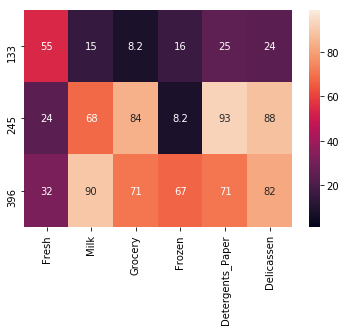

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
np.random.seed(15)
indices = np.random.choice(440, 3)
indices = np.sort(indices)
print(indices)

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

print("Quartile Visualization")
import seaborn as sns
percentiles = data.rank(pct=True)
percentiles = 100*percentiles.round(decimals=3)
percentiles = percentiles.iloc[indices]
_ = sns.heatmap(percentiles, vmin=1, vmax=99, annot=True)

Percentage of each categories (display by % below):


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,73.708884,8.141261,9.649191,3.406516,2.000156,3.093992
1,8.728869,17.543259,39.670458,0.655663,25.465378,7.936372
2,13.245907,35.178666,27.415948,7.756850,9.910227,6.492402


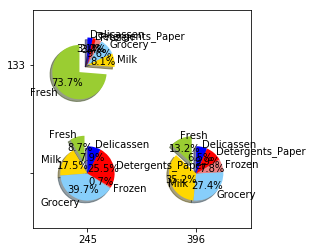

Chosen samples standardized by mean of dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,-0.202889,-0.644141,-0.706712,-0.542982,-0.550562,-0.400340
1,-0.706710,0.048507,0.627686,-0.585415,1.269334,0.446437
2,-0.591825,0.839388,0.146688,-0.088162,0.104240,0.243962


Chosen samples offset from median of dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,930.0,-2585.0,-3521.0,-1090.0,-560.0,-570.0
1,-5442.0,2527.0,9160.0,-1296.0,8117.0,1818.0
2,-3989.0,8364.0,4589.0,1118.0,2562.0,1247.0


Total of six categories:
0    12799
1    35079
2    34086
dtype: int64


In [4]:
dt = data.copy()
dt['Total'] = dt.sum(axis=1)

for key in dt.keys():
    dt[key] = dt[key] / dt.Total * 100

dt = dt.drop(['Total'], axis =1)
sps = pd.DataFrame(dt.loc[indices], columns = dt.keys()).reset_index(drop = True)
print('Percentage of each categories (display by % below):')
display(sps)

import matplotlib.pyplot as plt

# The slices will be ordered and plotted counter-clockwise.
labels = dt.keys()
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'red','blue']
explode = (0.1, 0, 0, 0, 0, 0) 

fig = plt.figure()
ax = fig.gca()

ax.pie(np.array(sps.iloc[[0]]).reshape(6,), explode=explode, labels=labels, colors=colors,
       autopct='%1.1f%%', shadow=True, startangle=90,
       radius=0.25, center=(0, 1), frame=True)
ax.pie(np.array(sps.iloc[[2]]).reshape(6,), explode=explode, labels=labels, colors=colors,
       autopct='%1.1f%%', shadow=True, startangle=90,
       radius=0.25, center=(1, 0), frame=True)
ax.pie(np.array(sps.iloc[[1]]).reshape(6,), explode=explode, labels=labels, colors=colors,
       autopct='%1.1f%%', shadow=True, startangle=90,
       radius=0.25, center=(0, 0), frame=True)

ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(["245", "396"])
ax.set_yticklabels(["", "133"])
ax.set_xlim((-0.5, 1.5))
ax.set_ylim((-0.5, 1.5))

# Set aspect ratio to be equal so that pie is drawn as a circle.
ax.set_aspect('equal')

plt.show()

print('Chosen samples standardized by mean of dataset:')
display((samples - np.around(data.mean().values)) / data.std())

print('Chosen samples offset from median of dataset:')
display(samples - np.around(data.median().values))

print('Total of six categories:')
print(samples.sum(axis=1))

In [5]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.copy()
# keys=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']
drop_key = 'Detergents_Paper'
target_label = new_data[drop_key]
new_data = new_data.drop([drop_key], axis = 1)

# TODO: Split the data into training and testing sets using the given feature as the target
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data, target_label, test_size=0.25, random_state=1)

# TODO: Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=20,max_depth=3)
regressor = regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print(score)

0.8392354358103181


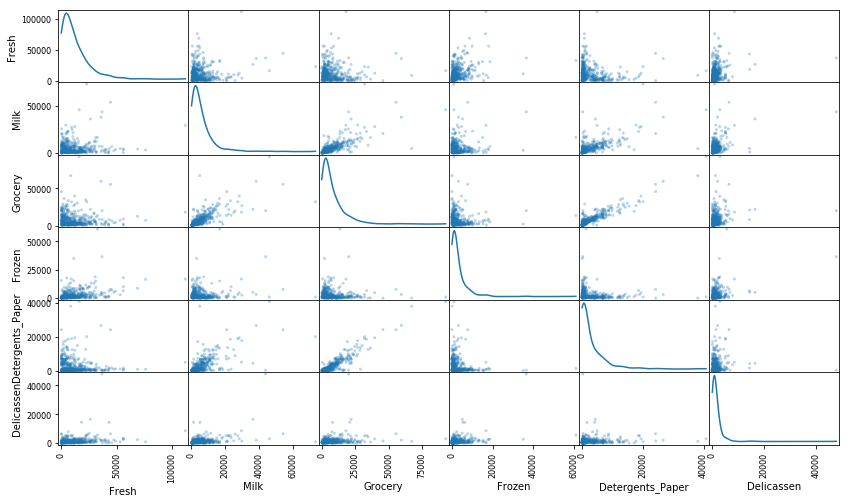

In [6]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

# Data Preprocessing

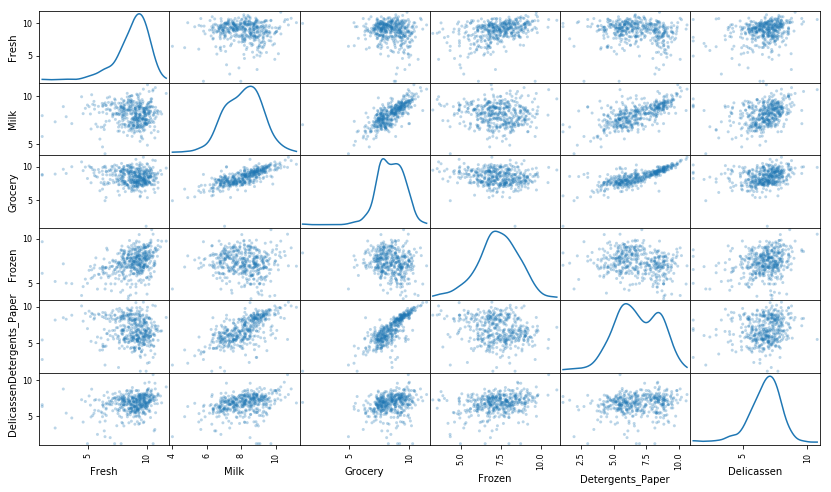

In [7]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data).copy()

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples).copy()

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');


In [8]:
# Display the log-transformed sample data
display(log_samples)


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.152075,6.948897,7.118826,6.077642,5.545177,5.981414
1,8.026824,8.724858,9.540795,5.438079,9.097508,7.931644
2,8.415160,9.391912,9.142597,7.880048,8.125039,7.702104


In [9]:
# For each feature find the data points with extreme high or low values
outliers = np.array([], dtype='int64')
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    print("Numbers of outlier of '%s': %s" %(feature, 
                                           log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].count()[feature]))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    ol = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index.values
    outliers = np.append(outliers,ol)
    
# OPTIONAL: Select the indices for data points you wish to remove
multiple_outliers, indices = np.unique(outliers, return_inverse=True)
counts = np.bincount(indices)
multiple_outliers = multiple_outliers[counts>1]
outliers = np.unique(outliers)
print(multiple_outliers)
print(outliers)

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':
Numbers of outlier of 'Fresh': 16


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':
Numbers of outlier of 'Milk': 4


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':
Numbers of outlier of 'Grocery': 2


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':
Numbers of outlier of 'Frozen': 10


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':
Numbers of outlier of 'Detergents_Paper': 2


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicassen':
Numbers of outlier of 'Delicassen': 14


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


[ 65  66  75 128 154]
[ 38  57  65  66  75  81  86  95  96  98 109 128 137 142 145 154 161 171
 175 183 184 187 193 203 218 233 264 285 289 304 305 325 338 343 353 355
 356 357 412 420 429 439]


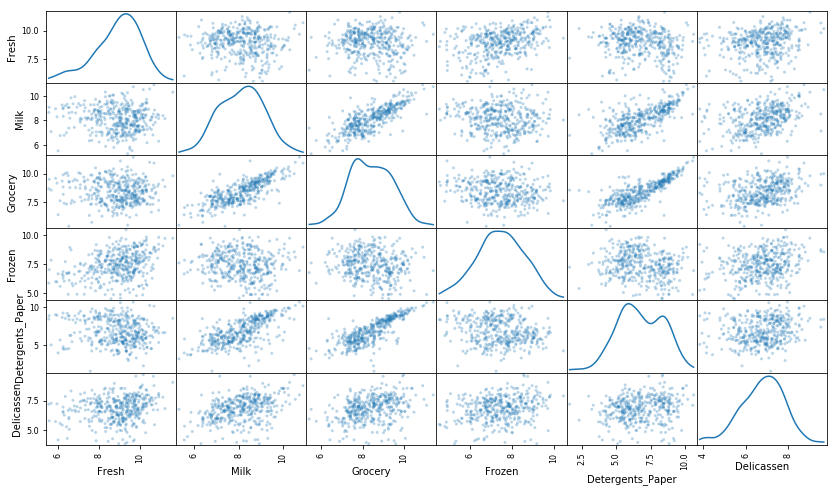

In [10]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(good_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

# Feature Transformation

Dimension 1    0.4993
Dimension 2    0.7252
Dimension 3    0.8301
Dimension 4    0.9279
Dimension 5    0.9767
Dimension 6    1.0000
Name: Explained Variance, dtype: float64


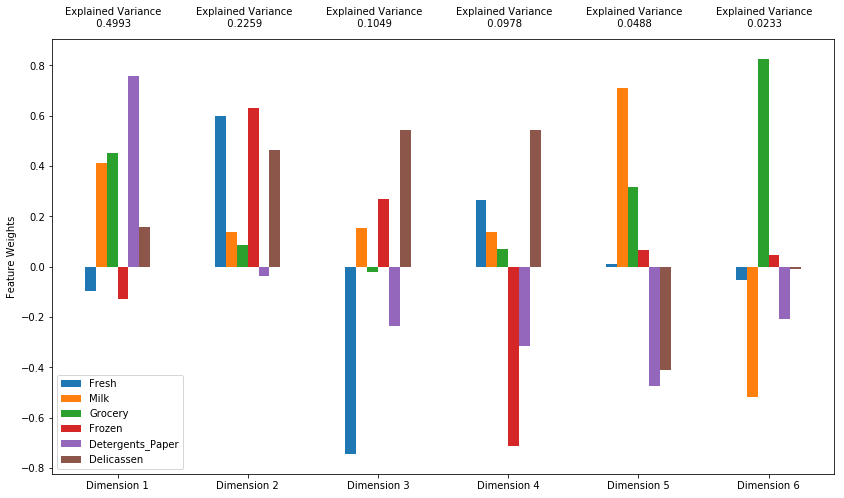

In [11]:
# TODO: Apply PCA to the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(n_components = 6).fit(good_data)

# TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

print(pca_results['Explained Variance'].cumsum())

In [12]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))


,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-1.9893,-1.3246,-0.8310,0.7147,-0.4051,-0.2769
1,3.0306,-1.1837,0.2848,1.2274,-0.9191,0.0795
2,1.9996,0.5756,0.8624,-0.1654,0.1500,-0.2967


In [13]:
# TODO: Fit PCA to the good data using only two dimensions
pca = PCA(n_components = 2).fit(good_data)

# TODO: Apply a PCA transformation the good data
reduced_data = pca.transform(good_data)

# TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

In [14]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))


,Dimension 1,Dimension 2
0,-1.9893,-1.3246
1,3.0306,-1.1837
2,1.9996,0.5756


In [15]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.cluster import KMeans

for n in range(9,1,-1):
    clusterer = KMeans(n_clusters=n, random_state=1)
    clusterer = clusterer.fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.cluster_centers_

    # TODO: Predict the cluster for each transformed sample data point
    reduced_samples = pd.DataFrame(pca_samples, columns = ['Dimension 1', 'Dimension 2'])
    sample_preds = clusterer.predict(reduced_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    from sklearn.metrics import silhouette_score
    score = silhouette_score(reduced_data, clusterer.labels_, metric='euclidean')
    print("For {} clusters, the mean silhouette coefficient is {:.3f}.".format(n, score))

For 9 clusters, the mean silhouette coefficient is 0.368.
For 8 clusters, the mean silhouette coefficient is 0.378.
For 7 clusters, the mean silhouette coefficient is 0.356.
For 6 clusters, the mean silhouette coefficient is 0.364.
For 5 clusters, the mean silhouette coefficient is 0.351.
For 4 clusters, the mean silhouette coefficient is 0.331.
For 3 clusters, the mean silhouette coefficient is 0.364.
For 2 clusters, the mean silhouette coefficient is 0.447.


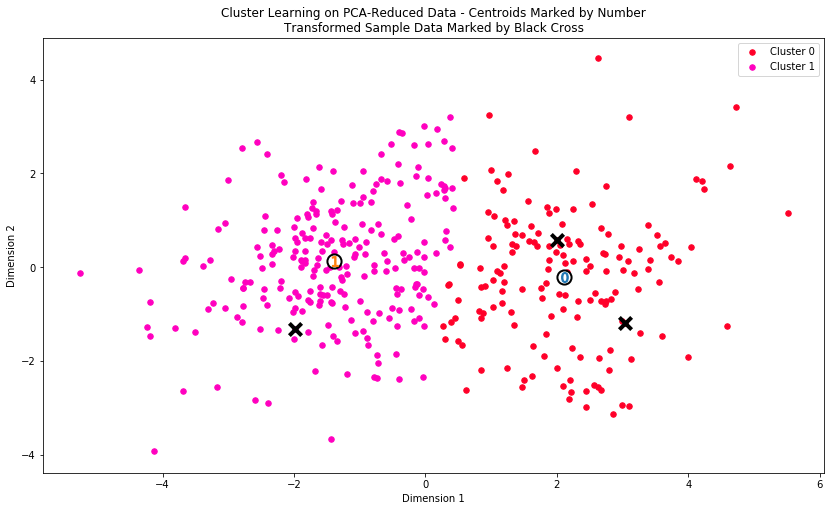

In [16]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

In [17]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Segment 0,5424.0,7780.0,11532.0,1123.0,4444.0,1136.0
Segment 1,9451.0,1938.0,2449.0,2200.0,307.0,771.0


In [18]:
por_cent = true_centers.copy()
por_cent['Total'] = por_cent.sum(axis=1)

for key in por_cent.keys():
    por_cent[key] = por_cent[key] / por_cent.Total * 100

por_cent = por_cent.drop(['Total'], axis =1)


In [19]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 0


In [20]:
print("Chosen samples of wholesale customers dataset:")
display(samples)
print('Percentage of each categories of Chosen samples: ')
display(sps)
print('Percentage of each categories of centers: ')
display(por_cent)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9434,1042,1235,436,256,396
1,3062,6154,13916,230,8933,2784
2,4515,11991,9345,2644,3378,2213


Percentage of each categories of Chosen samples: 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,73.708884,8.141261,9.649191,3.406516,2.000156,3.093992
1,8.728869,17.543259,39.670458,0.655663,25.465378,7.936372
2,13.245907,35.178666,27.415948,7.756850,9.910227,6.492402


Percentage of each categories of centers: 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Segment 0,17.252457,24.746334,36.680556,3.571997,14.135310,3.613346
Segment 1,55.217341,11.322739,14.308250,12.853470,1.793643,4.504557


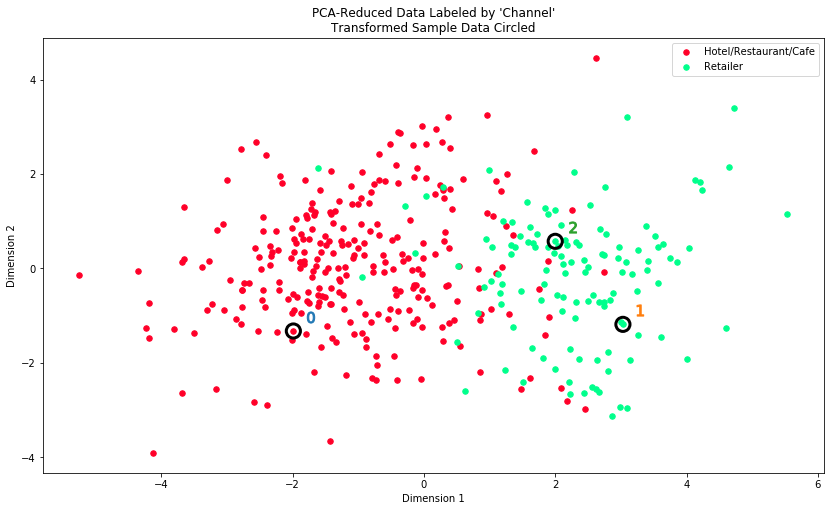

In [21]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)
